# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | ustka
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | inekar
City not found. Skipping...
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | malango
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | mandera
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | port douglas
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | mantua
Processing Record 20 of Set 1 | praia
Processing Record 21 of Set 1 | puerto natales
Processing Rec

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,10.62,96,100,1.51,CL,1702343054
1,whitehorse,60.7161,-135.0538,-5.29,91,48,4.18,CA,1702343487
2,rio grande,-32.0350,-52.0986,21.08,84,33,7.28,BR,1702343487
3,waitangi,-43.9535,-176.5597,15.46,89,100,4.02,NZ,1702343488
4,ustka,54.5805,16.8619,2.03,98,100,2.14,PL,1702343489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

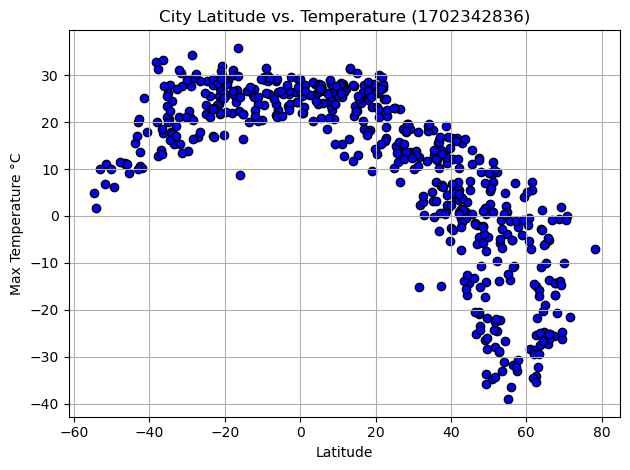

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

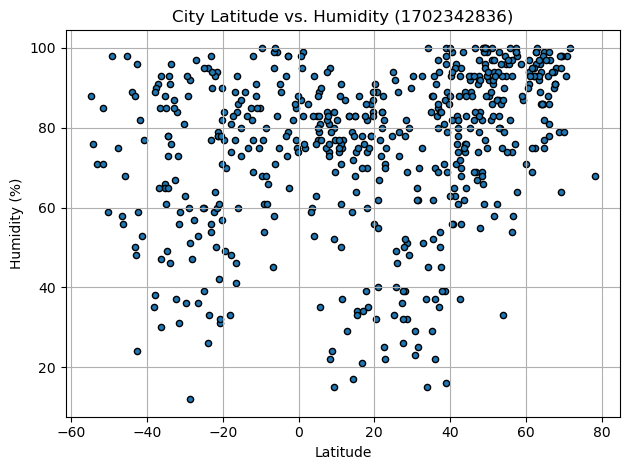

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

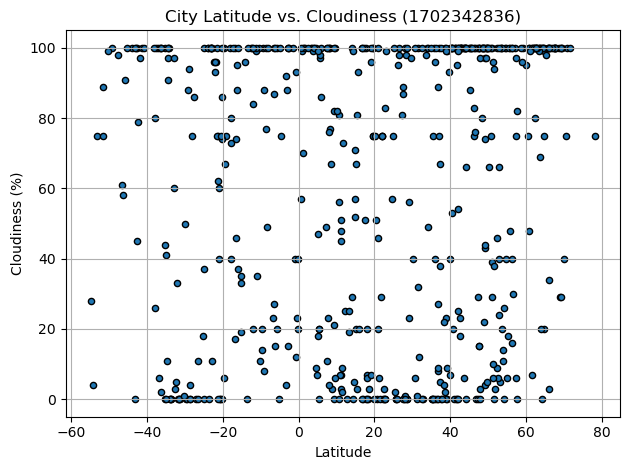

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

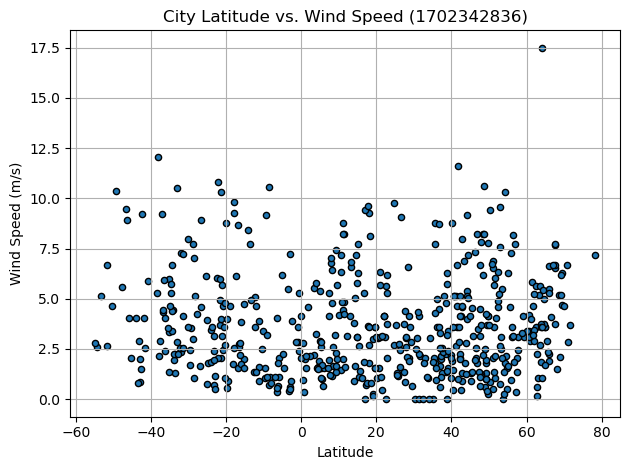

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {vbl} - {hemi}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')



In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,-5.29,91,48,4.18,CA,1702343487
4,ustka,54.5805,16.8619,2.03,98,100,2.14,PL,1702343489
8,isafjordur,66.0755,-23.1240,-5.08,81,34,1.89,IS,1702343490
9,iqaluit,63.7506,-68.5145,-27.55,96,69,1.85,CA,1702343192
12,mandera,3.9366,41.8670,28.03,53,100,3.22,KE,1702343091


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,10.62,96,100,1.51,CL,1702343054
2,rio grande,-32.0350,-52.0986,21.08,84,33,7.28,BR,1702343487
3,waitangi,-43.9535,-176.5597,15.46,89,100,4.02,NZ,1702343488
5,avarua,-21.2078,-159.7750,27.03,78,75,10.29,CK,1702343489
6,port alfred,-33.5906,26.8910,17.32,96,0,2.24,ZA,1702343093


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.77x + 33.71
The r-value is: -0.8251199279163806


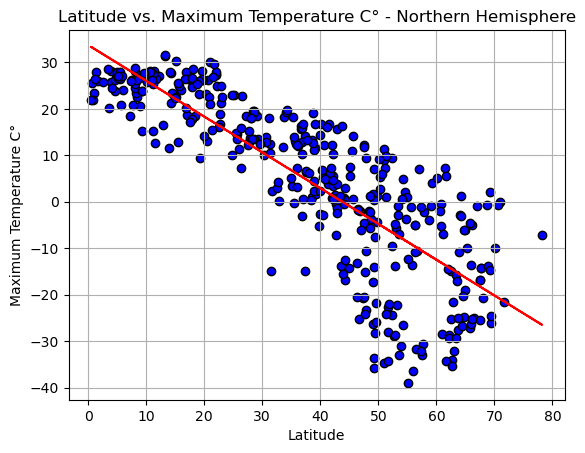

In [30]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.28x + 29.39
The r-value is: 0.5931201026227569


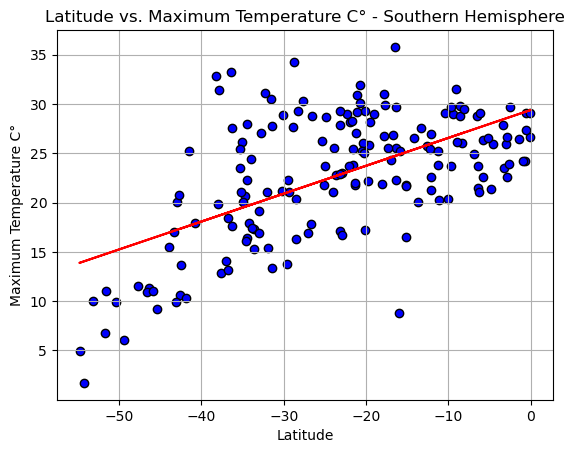

In [31]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.37x + 63.13
The r-value is: 0.3559145714257789


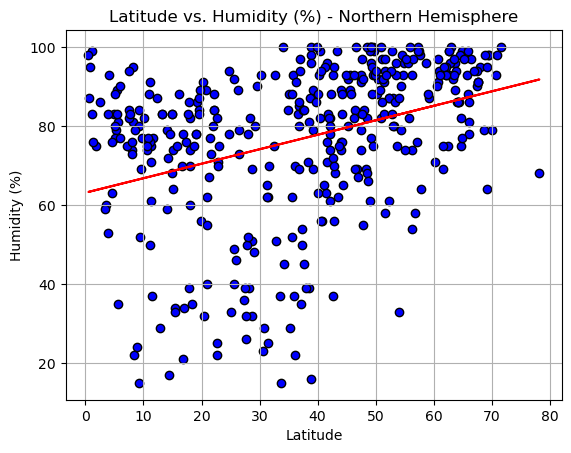

In [32]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()


Linear equation: y = 0.25x + 77.69
The r-value is: 0.17762122905349842


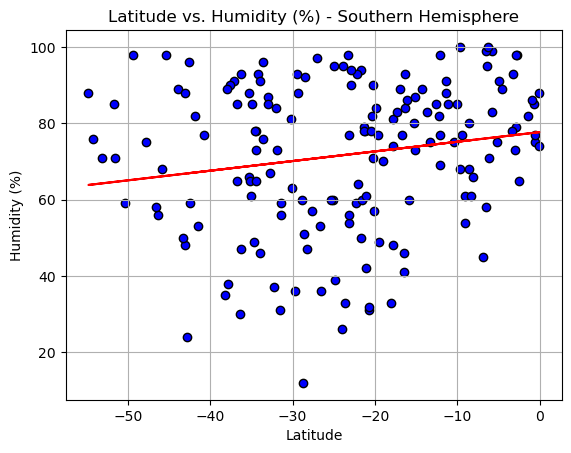

In [33]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='b', edgecolors='k')

plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()


**Discussion about the linear relationship:**

The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.43x + 44.42
The r-value is: 0.20236671325172575


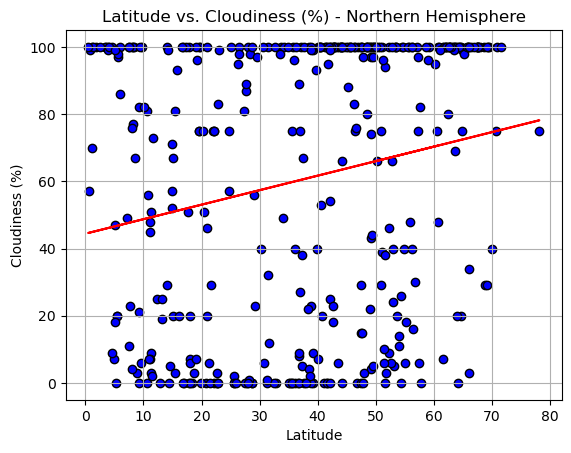

In [34]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()


Linear equation: y = -0.0x + 59.23
The r-value is: -0.0005769902329378689


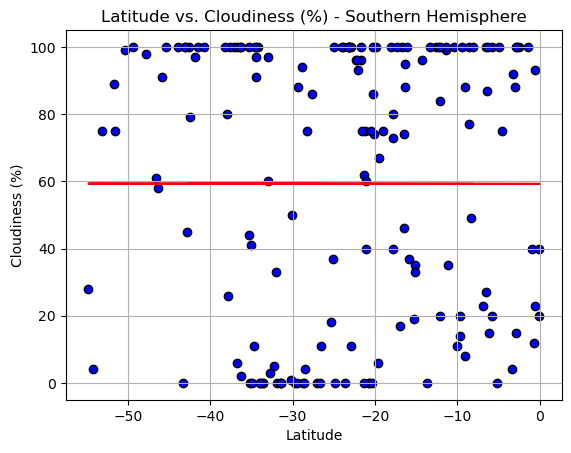

In [35]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='b', edgecolors='k')

plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** 

The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 3.01
The r-value is: 0.11526659465142872


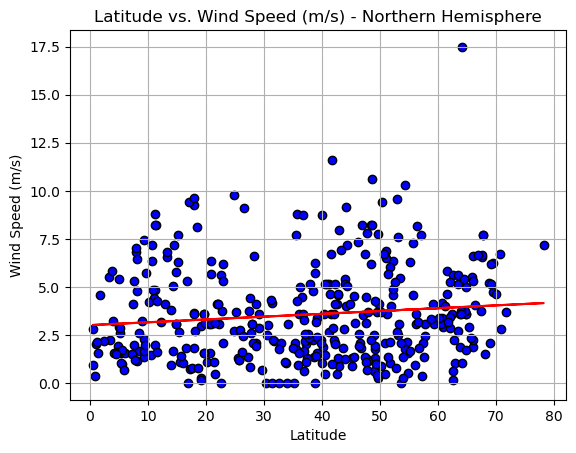

In [36]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

plt.grid()
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.04x + 2.83
The r-value is: -0.22362401091236023


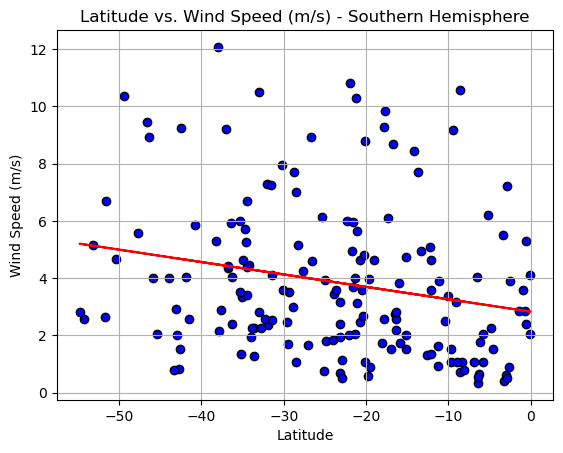

In [37]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='b', edgecolors='k')

plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()


**Discussion about the linear relationship:** 

In the Latitude vs Wind speed the both hemispheres and the scatter points show that the data is too spread for there to be any realiable correlation between latitude and wind speed.